# Supervised Classification With Two Classes

### Problem Assessment: Fraud Detection
#### Features are given (V1....V30)
#### Prediction: Fraud or not fraud
#### Approach: Binary Classification for which a typical loss function (binary cross-entropy or log loss) can be used.
#### Note: Log loss function should return high values for bad predictions and low values for good predictions

####  Logistic Regression Model -- Output is a probability
####  Log loss:  a way to evaluate the predicted probabilities.
####  auROC: Plot the true positive rate versus negative rate for the predictions.
####  auROC score of 0.5 -- no skill (curve along diagonal line)
####  auROC score of 1.0 -- perfect skill( all points along the left y-axis an dtop x-axis toward the top let corner)
####  auROC score of 0.0 -- perfectly incorrect predictions.
####  Threshold -- Sets as a function of the true labels and the predicted -- (allows to optimize the model)
####  Naive Bayes - To ensure no discrimination takes place if the same probability is predicted for the same class.
####  Brier score - (Since we have two possible events) To measure the accuracy of probabilistic predictions.
####  Confusion Matrix -- Compare the predicted outcomes to the actual outcomes.
          

# Objective:
####    1. Data Exploration
####    2. Generate feature Matrix and labels to be used for the model
####    3. Feature Matrix Standardization
####    4. Feature Correlation
####    5. Model Creation:
####           a. Split the dataset (Training & Test Sets)

In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
# Dependencies

import numpy as np
import pandas as pd
from termcolor import colored as cl # text customization
import os
import pydot

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
%matplotlib inline

# Data Prep

from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn import datasets
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from IPython.display import Image


# Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine



In [3]:
data = pd.read_csv("Resources/credit_card.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Exploration

### Summary Statistics


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Scatter Matrix
#pd.plotting.scatter_matrix(data, alpha=0.2)

In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data['Class'].sum()

492

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Identify the NaN values

In [11]:
# Non-numerical values
nanCounter = np.isnan(data).sum()
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Based on the above, none of the observations have NaNs

In [12]:
# Finding the Distinct Values in our dataset

distinctCounter = data.apply(lambda x: len(x.unique()))
distinctCounter

Time      124592
V1        275653
V2        275655
V3        275657
V4        275654
V5        275657
V6        275652
V7        275651
V8        275643
V9        275656
V10       275646
V11       275648
V12       275654
V13       275657
V14       275653
V15       275653
V16       275645
V17       275646
V18       275655
V19       275645
V20       275632
V21       275617
V22       275644
V23       275611
V24       275645
V25       275640
V26       275647
V27       275597
V28       275558
Amount     32767
Class          2
dtype: int64

#### As previously noted, the total observations were 284,807. From this result, it can be concluded that we do have multiple transcactions 
#### for a given timestamp as we have 124,592 distinct timestamps.
#### Also, with Class having a value of 2 matching our expectation in representing the two classes in the data where zero (0) delineates a non-fraudulent transaction and one (1) a fraudulent transaction. 

## Data Processing

In [13]:
# Data Processing 
cases = len(data)
nonfraud_count = len(data[data.Class == 0])
fraud_count = len(data[data.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of instances: {}'.format(cases), attrs = ['bold']))
print(cl('Number of Instances of fraud: {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Instances of Non-fraud: {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud: {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of instances: 284807
Number of Instances of fraud: 284315
Number of Instances of Non-fraud: 492
Percentage of fraud: 0.17
--------------------------------------------


In [14]:
# Generate feature matrix and labels array

dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

In [15]:
dataX

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [16]:
dataY

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

#### Here, we have the feature X as a matrix and the labels Y as an array where 1 = fraud, and 0 = no fraud.

#### It is to be noted that the feature matrix X and the label array Y have not yet been standardized to create our model

# Creating the labels array Y and the feature matrix X.

In [17]:
# Generate feature matrix and labels array
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

## Standardize the feature Matrix X

#### To constrain our analysis within the bound of 1 = fraud and 0 = no fraud, we need to rescale the feature matrix, with the exception of time, so that the mean is zero and the standard deviation is 1. 
#### Reason being, the data may very well have a normal distribution (normally distributed) but does not have the same mean and stardard deviations. Because of that we want to standardize the data so to have a standard normal distribution.
#### A standard normal distribution is normal distribution with a mean of zero (0) and a standard deviation of one (1).

In [18]:
# Feature scaling
featuresToScale = dataX.drop(['Time'],axis=1).columns
featuresToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [19]:
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])
scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)

In [20]:
scalingFactors

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,1.759072e-12,-8.251146e-13,-9.655448e-13,8.321385e-13,1.649983e-13,4.248434e-13,-3.054696e-13,8.777981e-14,-1.179757e-12,7.092627e-13,...,1.766109e-12,-3.405785e-13,-5.723165e-13,-9.725860e-13,1.464148e-12,-6.987110e-13,-5.617884e-13,3.332082e-12,-3.518875e-12,88.349619
StDev,1.958692e+00,1.651306e+00,1.516252e+00,1.415866e+00,1.380244e+00,1.332269e+00,1.237091e+00,1.194351e+00,1.098630e+00,1.088848e+00,...,7.709237e-01,7.345227e-01,7.257003e-01,6.244592e-01,6.056460e-01,5.212772e-01,4.822262e-01,4.036318e-01,3.300827e-01,250.119670


#### As we can see, the features have been standardized with a mean of zero and a standard deviation of 1. 

In [21]:
# Summary Statistics - Standardized data
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-1.536091e-15,-3.693350e-16,-2.082561e-15,9.153351e-16,5.854865e-18,2.784804e-16,2.636489e-16,2.820733e-16,1.465833e-16,...,-5.225632e-16,1.308865e-16,-8.043247e-16,-6.657393e-17,1.487786e-16,-4.774076e-16,-3.018009e-16,3.521028e-17,-4.119621e-17,3.202236e-16
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [22]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


## Checking Correlation of features

In [23]:
# Correlation Features

correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,
columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],
            dataX.loc[:,j])[0],2)
#corr.style.background_gradient(cmap='coolwarm')
#correlationMatrix.style.background_gradient(cmap='coolwarm')
#colormap = plt.cm.RdBu
#plt.figure(figsize=(25,20))
#plt.title('Pearson Correlation of Features', y=1.05, size=15)
#ns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
#            square=True, cmap=colormap, linecolor='white', annot=True)
correlationMatrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01
V1,0.12,1,0,-0,-0,-0,-0,-0,0,0,...,0,-0,0,-0,-0,0,0,0,-0,-0.23
V2,-0.01,0,1,0,-0,-0,0,0,0,0,...,0,0,-0,-0,0,-0,-0,-0,0,-0.53
V3,-0.42,-0,0,1,0,-0,-0,0,-0,-0,...,0,0,-0,0,0,0,-0,-0,0,-0.21
V4,-0.11,-0,-0,0,1,-0,0,0,0,-0,...,-0,-0,0,-0,-0,0,-0,-0,-0,0.1
V5,0.17,-0,-0,-0,-0,1,-0,0,-0,-0,...,-0,-0,0,0,-0,0,-0,-0,0,-0.39
V6,-0.06,-0,0,-0,0,-0,1,-0,-0,0,...,-0,0,-0,-0,0,-0,0,0,-0,0.22
V7,0.08,-0,0,0,0,0,-0,1,0,0,...,0,0,-0,-0,-0,-0,-0,-0,0,0.4
V8,-0.04,0,0,-0,0,-0,-0,0,1,-0,...,-0,-0,-0,0,-0,-0,0,-0,0,-0.1
V9,-0.01,0,0,-0,-0,-0,0,0,-0,1,...,0,0,-0,-0,0,-0,-0,0,-0,-0.04


In [24]:
#correlation_file = os.path.sep.join(['', 'Resources', 'correlationMatrix.csv'])
#correlationMatrix.to_csv("Resources/correlationMatrix.csv")

In [25]:
# count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
# ax = sns.barplot(x=count_classes.index, y=tuple(count_classes/len(data)))
# ax.set_title('Frequency Percentage by Class')
# ax.set_xlabel('Class')
# ax.set_ylabel('Frequency Percentage')

## Setting up the Model
### Train...

### In setting up the model, we are going to split the data into Training and Test sets.The training data is what the model will learn from in order to precisely predict the outcome which we refer to as Performance.

In [26]:
# Splitting the dataset into a training and a test set

X_train, X_test, y_train, y_test = train_test_split(dataX, 
                                    dataY, test_size=0.33, 
                                    random_state=2018, stratify=dataY)
X_train, X_test, y_train, y_test

(            Time        V1        V2        V3        V4        V5        V6  \
 142087   84575.0 -1.011878  1.170867  0.201381 -0.252129 -0.386390 -0.049420   
 165168  117245.0  0.072173  0.665164 -0.241837 -0.380205  0.699456 -0.634194   
 235908  148591.0  0.099579 -0.389819 -0.944884 -1.492064 -0.090536 -0.879539   
 148255   89630.0  0.015623  0.520260  0.191791 -0.418058  0.320155 -0.775673   
 145672   87121.0  0.009169  0.524802  0.173686 -0.334556  0.766454  0.505087   
 ...          ...       ...       ...       ...       ...       ...       ...   
 30023    35743.0 -0.249496  0.101075  0.909879 -0.688839 -0.389697 -0.969098   
 195475  131077.0 -0.254091 -2.756705 -2.082848  0.720192 -0.770847  0.043816   
 48687    43742.0  0.106034 -1.131050 -0.470366  0.156445 -0.553642 -0.376423   
 159608  112716.0  0.055698  0.496830 -0.098914 -0.582971  0.647489 -0.393782   
 197673  132124.0 -0.377027  0.314696 -2.094645 -3.273754  1.733317  1.665912   
 
               V7        V

### We have devided the dataset into a training set with 190,280 instances and a Test set with 93,987 instances.
### The training set represents 67% of the original dataset while the Test set accounts for 33%.
### Percent of fraud : 0.17% (492/284,807)
### In order to make the model reproducible, we have set the random state to a fixed value.
### Our Test Set will be used for final evaluation, and the Training Set to train the model.
### The objective is to start the model with a set of error rate and expect the algorithm to - after training - to minimize the error rate of time.
### In our analysis, the error rate is a value function or the "Log loss function". we use the log loss a way to evaluate the predicted probabilities. 

## Verifying the results

In [27]:
# Training Set
len(X_train)

190820

In [28]:
#Test Set
len(X_test)

93987

In [29]:
# Fraud Percentage for both the training set and the test set
y_train.sum()/len(y_train)

0.0017293784718582959

## K-Fold Cross-Validation

## Since we only have 492 instances of fraud counts, instead of using a validation set to predict the performance of the model we will the k-fold cross-validation to compare the performance of the model.So, instead of spliting the training set into fifths, then train the model on four-fiths of the training set, and then use the fith part of the data to make predictions and validation, we will use five (k =5) estimates for the generalization error which will give us a prediction for the entire dataset.

In [30]:
# Setting up the k-fold cross-validation
# Set k = 5.
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)

## Building the Machine Learning Models

### Classification algorithm: Logistic Regression

## Setting The Hyperparmeters

In [31]:
# Set Hyperparmeters
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)
logReg 

LogisticRegression(class_weight='balanced', n_jobs=1, random_state=2018,
                   solver='liblinear')

## Training The Model: Logistic Regression

In [32]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train))
                                          ,y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, 
                               model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, 
                         predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, 
                                     predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Training Log Loss:  0.10966378879175721
CV Log Loss:  0.10878858626142697
Training Log Loss:  0.10455883234163768
CV Log Loss:  0.10403704030128372
Training Log Loss:  0.1154247820154956
CV Log Loss:  0.11767586472649372
Training Log Loss:  0.11558238465866767
CV Log Loss:  0.11816819314691011
Training Log Loss:  0.09709118353383613
CV Log Loss:  0.09697122180543816
Logistic Regression Log Loss:  0.10912818124831054


#### The training and cross-validation log losses appear to be simmilar. As such, we don't have an overfitting issue. In case of overfitting, we would have had high cross-validation log loss and low training log loss.
#### Each of the five cross-validation sets are being stored, so we can combine the predictions into a single set and then calculate the overall log loss for the entire training set which our best estimate for the test set.

## Evaluate the Model Using the Precision-recall and the Receiver Operating Characteristic


In [33]:
# Precision-recall curve and calculate the average precision.

preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()
predictionsBasedOnKFoldsLogisticRegression

,trueLabel,prediction
142087,0,0.00082479
165168,0,0.031958
235908,0,0.16064
148255,0,0.00690869
145672,0,0.0373427
...,...,...
30023,0,0.251519
195475,0,0.0393776
48687,0,0.0185337
159608,0,0.00471368


In [34]:
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
precision, recall, thresholds

(array([0.00177789, 0.00177251, 0.00177252, ..., 0.86290323, 0.87179487,
        1.        ]),
 array([1.        , 0.9969697 , 0.9969697 , ..., 0.32424242, 0.30909091,
        0.        ]),
 array([5.1900706860904087e-05, 5.194212361675715e-05,
        5.1952215034101006e-05, ..., 0.9999999999999996,
        0.9999999999999998, 1.0], dtype=object))

In [34]:
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])
average_precision

0.7349385498608252

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.73')

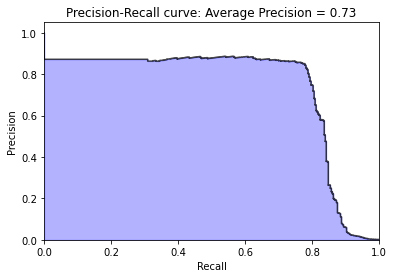

In [35]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

#### Based on the precision-recall curve, we have about 80% recall (the model has the ability to identify 80% of the fraud transactions) with about 70% precision meaning 70% of the transactions are effectively fraud, with 30% of the transactions being identified incorrectly.
#### The average precision-recall curve for the model is show to be 0.73, which is not really an indicator as to the fitness of the model.

## Comparing the Logistic regression model (LRM) with the area under the Receiver Operating Characteristic (auROC)

In [36]:
# Receiver Operating Characteristic
# We will use the area under the receiver
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
fpr, tpr, thresholds 

(array([0.00000000e+00, 7.87442910e-05, 8.92435298e-05, 8.92435298e-05,
        8.92435298e-05, 9.44931492e-05, 9.44931492e-05, 9.44931492e-05,
        9.44931492e-05, 9.44931492e-05, 9.44931492e-05, 9.44931492e-05,
        9.44931492e-05, 9.97427686e-05, 9.97427686e-05, 1.04992388e-04,
        1.04992388e-04, 1.10242007e-04, 1.10242007e-04, 1.15491627e-04,
        1.15491627e-04, 1.20741246e-04, 1.20741246e-04, 1.25990866e-04,
        1.25990866e-04, 1.31240485e-04, 1.31240485e-04, 1.36490104e-04,
        1.36490104e-04, 1.41739724e-04, 1.41739724e-04, 1.52238963e-04,
        1.52238963e-04, 1.57488582e-04, 1.57488582e-04, 1.62738201e-04,
        1.62738201e-04, 1.67987821e-04, 1.67987821e-04, 1.78487060e-04,
        1.78487060e-04, 1.83736679e-04, 1.83736679e-04, 1.88986298e-04,
        1.88986298e-04, 1.94235918e-04, 1.94235918e-04, 1.99485537e-04,
        1.99485537e-04, 2.04735157e-04, 2.04735157e-04, 2.09984776e-04,
        2.09984776e-04, 2.15234396e-04, 2.15234396e-04, 2.204840

In [37]:
# Area Under the Receiver Operating Characteristics
areaUnderROC = auc(fpr, tpr)
areaUnderROC

0.9705834474727854

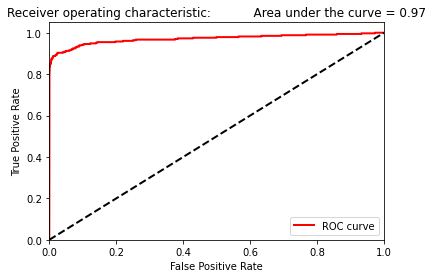

In [38]:
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

#### We use the auROC as a metric to evaluate the fitness/goodness of the LRM.
#### In comparing the the LRM with the auROC, the larger the auROC, the better the solution.
#### The closer the curve is to the top left corner of the plot, the better the solution.
#### We have found that the auROC= 0.97
#### Just as the Average Precision value = 0.73, the auROC = 0.97 still doesn't tell us much about the model. As such we need other models to compare our LRM model to.

# Random Forests Model

In [39]:
# Setting the Hyperparameters
n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

In [40]:
# Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

## Train The Model 

#### We have set the data to run the k-fold validation five time, but we will train on 4/5 of the training data and use the 5th set to make the prediction.

In [41]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                          index=y_train.index,columns=[0,1])
                                      
model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, \
                                model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossRandomForestsClassifier = log_loss(y_train, 
                                          predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

Training Log Loss:  0.0004570758747246713
CV Log Loss:  0.009090797476425144
Training Log Loss:  0.0004101805310493279
CV Log Loss:  0.012640234648018377
Training Log Loss:  0.00040027341363592047
CV Log Loss:  0.009990776910341356
Training Log Loss:  0.0003894650263288808
CV Log Loss:  0.006620007375395402
Training Log Loss:  0.0004291016183715201
CV Log Loss:  0.01348243171548044
Random Forests Log Loss:  0.010364849625132141


#### It appears as if, by choosing the default hyperparmeters, the Random Forest Classifier overfits the data as the training log losses for the Random Forest Model are lower than the cross-validation log losses.

#### The log losses for the entire training set: Random Forests Log Loss:  0.010364849625132141

## Precision-recall curve

## Evaluate the Model Using the Precision-recall and the Receiver Operating Characteristic

In [42]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
precision, recall, thresholds

(array([0.00172938, 0.32004556, 0.81458967, 0.90068493, 0.93065693,
        0.94636015, 0.95528455, 0.95217391, 0.955     , 0.96341463,
        0.96808511, 1.        ]),
 array([1.        , 0.85151515, 0.81212121, 0.7969697 , 0.77272727,
        0.74848485, 0.71212121, 0.66363636, 0.57878788, 0.47878788,
        0.27575758, 0.        ]),
 array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
       dtype=object))

## Average Precision

In [43]:
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])
average_precision

0.7891826802227376

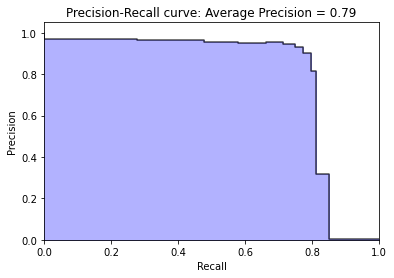

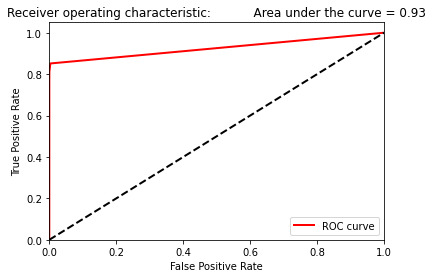

In [44]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(
          areaUnderROC))
plt.legend(loc="lower right")
plt.show()

#### The Random Forest Model, as seen from the curve, seems to identify 80% of all the fraudulent transactions with about 80% precision.
#### This model appears to be more efficient at correctly identifies the fraudulent transactions.

## Load Data and train model

In [45]:
X, y = fetch_openml(data_id=42175, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

### Create :class:`RocCurveDisplay`
 The roc curve requires either the probabilities or the non-thresholded
 decision values from the estimator. Since the logistic regression provides
 a decision function, we will use it to plot the roc curve:

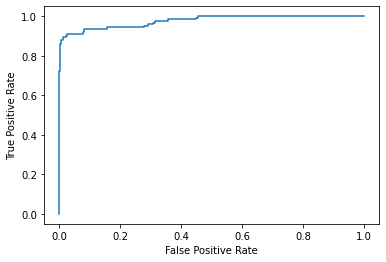

In [46]:
y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### Create :class:`PrecisionRecallDisplay`
 Similarly, the precision recall curve can be plotted using `y_score` from
 the prevision sections.

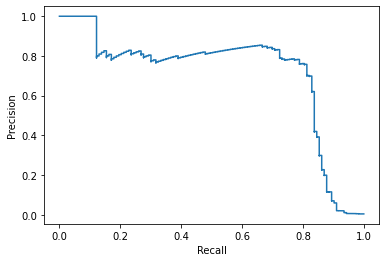

In [47]:
prec, recall, _ = precision_recall_curve(y_test, y_score,
                                         pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### Combining the display objects into a single plot
 The display objects store the computed values that were passed as arguments.
 This allows for the visualizations to be easliy combined using matplotlib's
 API. In the following example, we place the displays next to each other in a
 row.

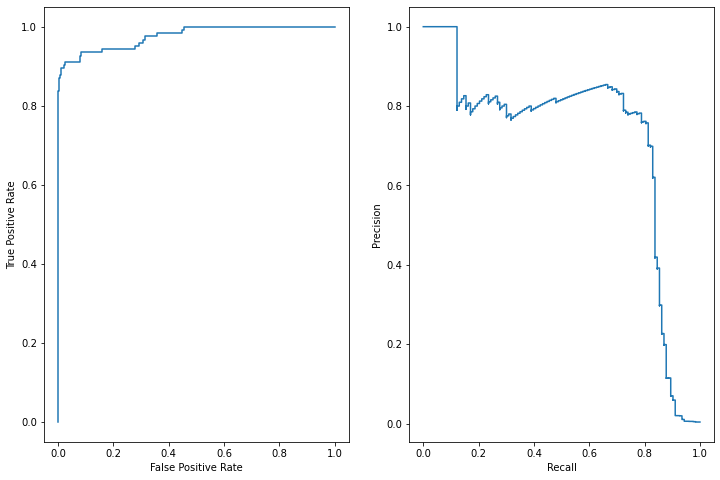

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

In [49]:
## Plotting the ROC curve for a fitted support vector machine:

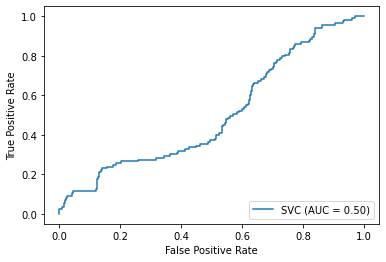

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

svc_disp = plot_roc_curve(svc, X_test, y_test)

## Compare the SVC Model with the Random Forest Model

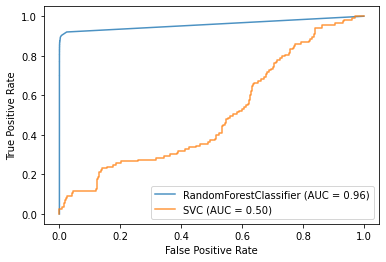

In [51]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)

## Performance Measurement Analysis Using  Random Forest Classifier

### Create :class:`ConfusionMatrixDisplay`
 With the fitted model, we compute the predictions of the model on the test
 dataset. These predictions are used to compute the confustion matrix which
 is plotted with the :class:`ConfusionMatrixDisplay`

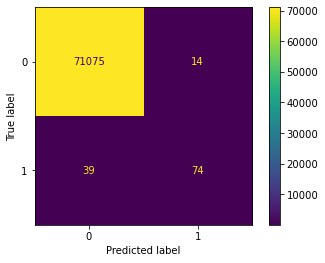

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [52]:
# Visualizing the random tree

rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
feature_list = list(X.columns)

In [57]:
# Pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)


In [58]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

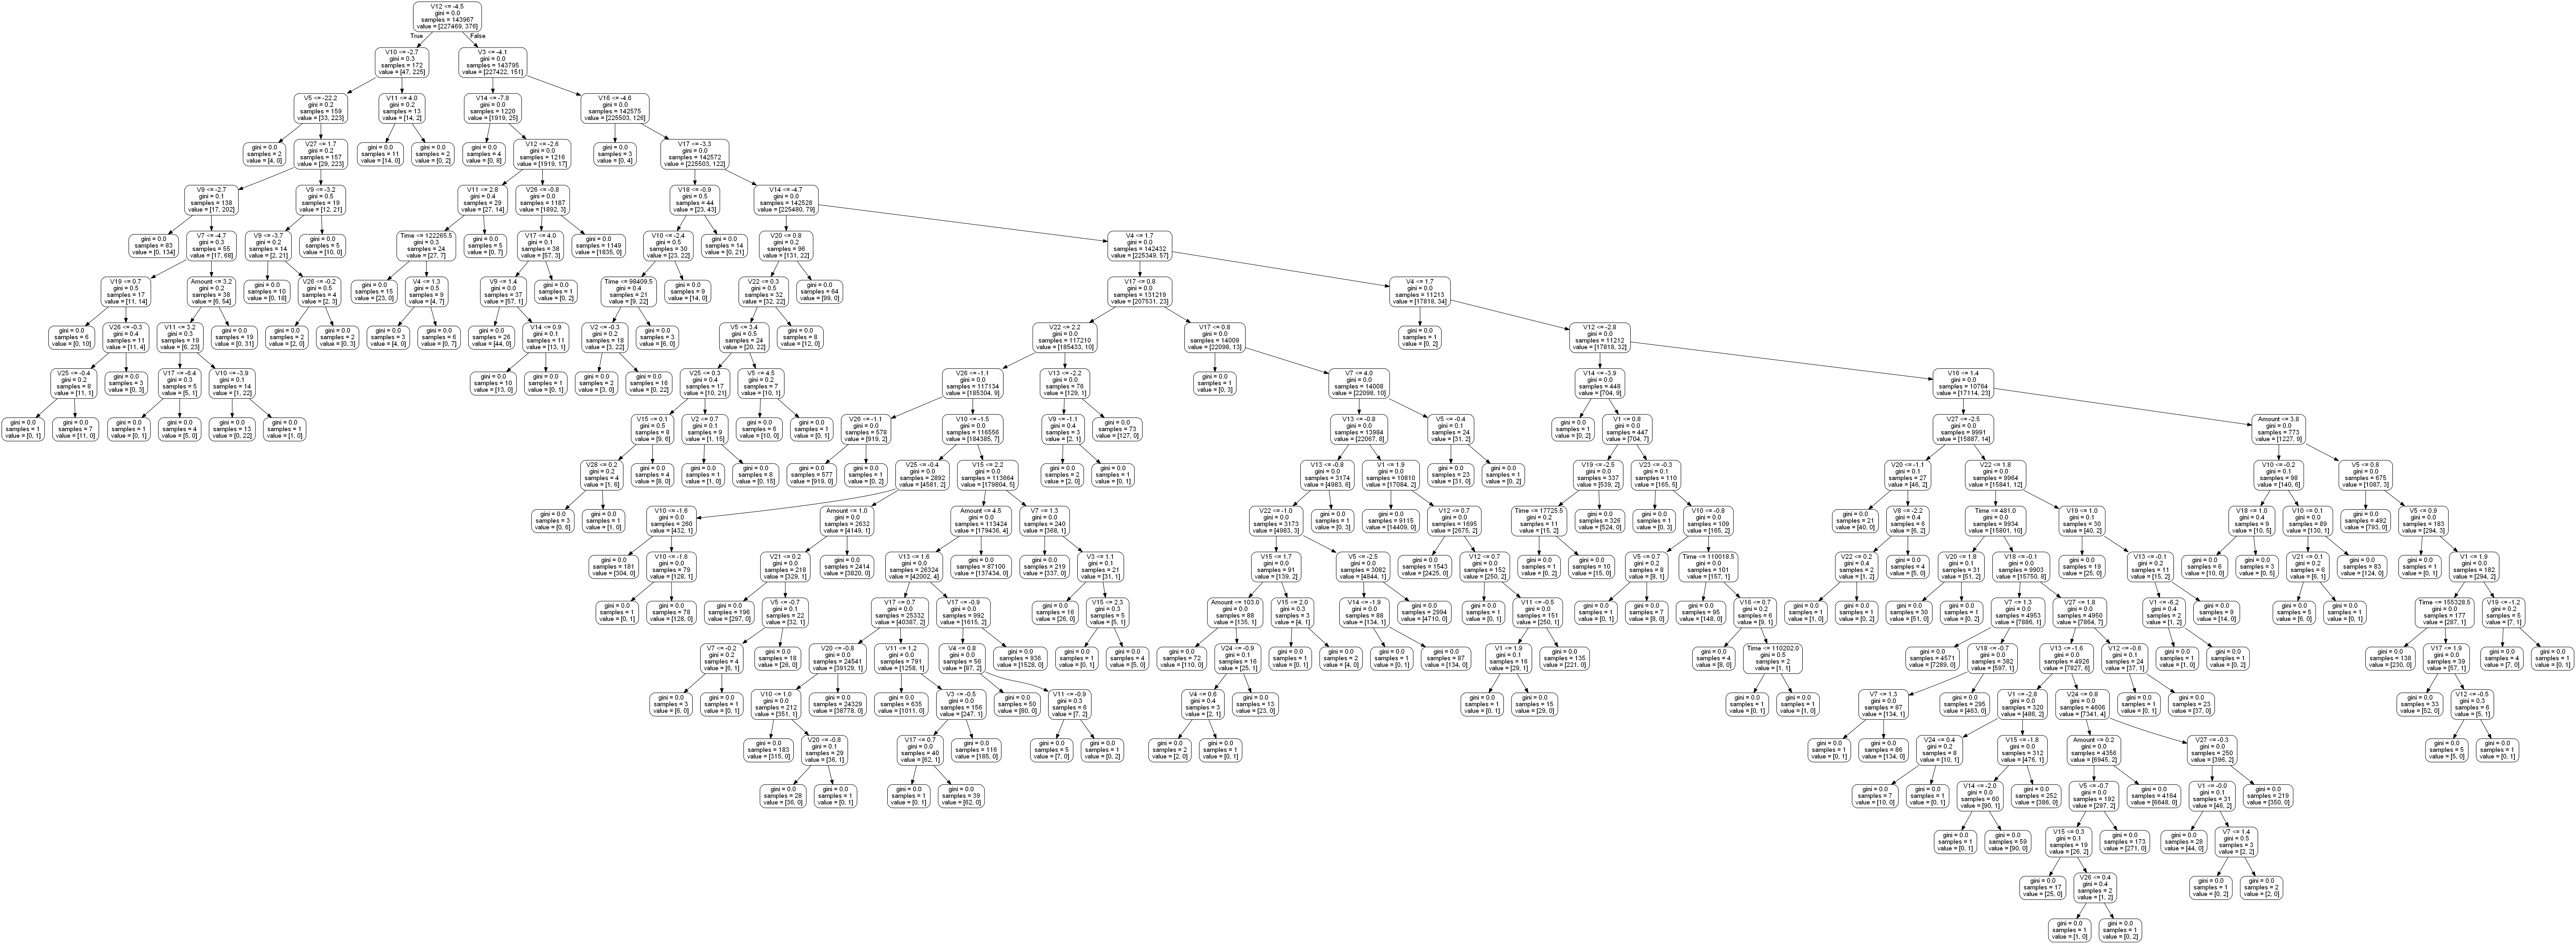

In [59]:
# Write graph to a png file
display(Image(graph.create_png()))